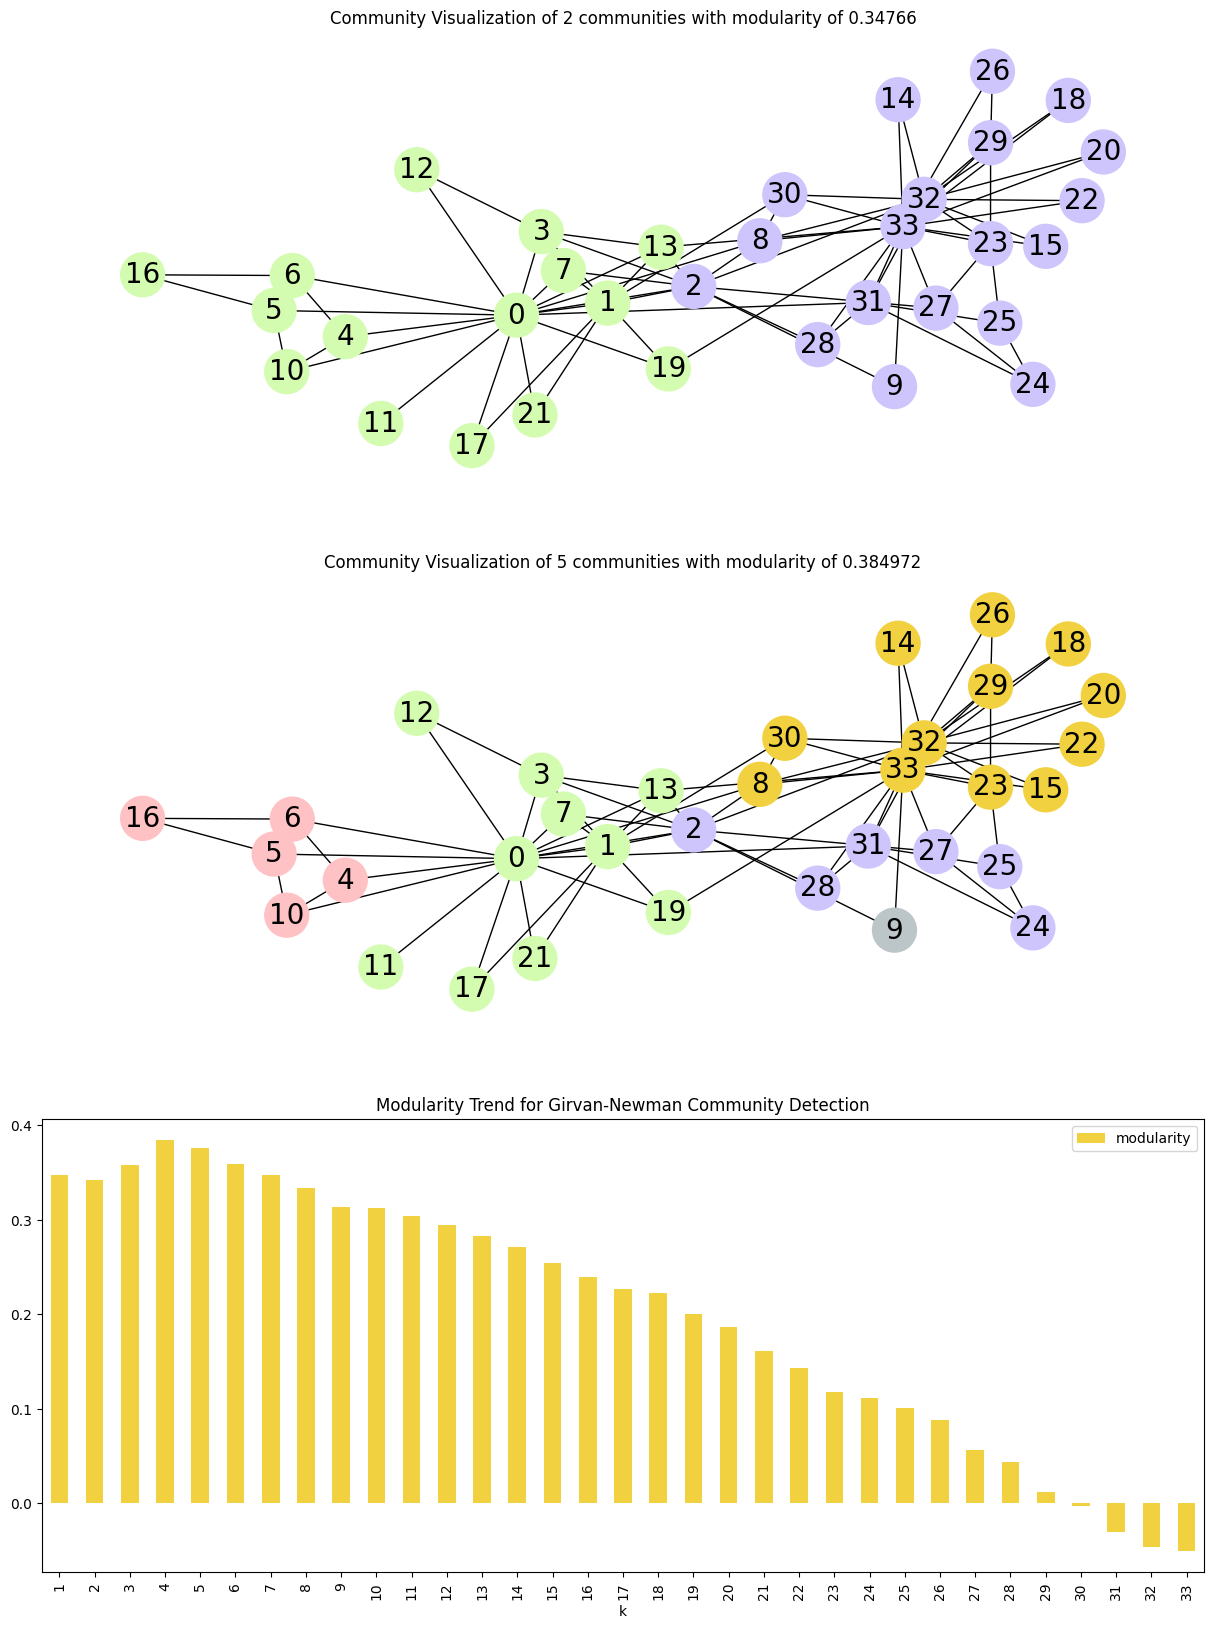

In [4]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load the Karate Club graph
G = nx.karate_club_graph()

# Find communities using the Girvan-Newman algorithm
communities = list(nx.community.girvan_newman(G))

# Initialize a figure with three subplots
fig, ax = plt.subplots(3, figsize=(15, 20))

# Function to create node colors based on communities
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []

    for node in graph.nodes():
        for i, community in enumerate(communities):
            if node in community:
                node_colors.append(colors[i])
                break

    return node_colors

# Function to visualize communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)

    plt.subplot(3, 1, i)
    plt.title(title)

    nx.draw(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )

# Visualize two different community divisions
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[3], 2)

# Calculate modularity values and create a DataFrame
modularity_df = pd.DataFrame({
    "k": range(1, len(communities) + 1),
    "modularity": [nx.community.modularity(G, c) for c in communities]
})

# Plot the change in modularity as edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)

# Show the plots
plt.show()


In [2]:
!pip install networkx

     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ----- ---------------------------------- 0.3/2.1 MB 8.3 MB/s eta 0:00:01
     ----------- ---------------------------- 0.6/2.1 MB 9.1 MB/s eta 0:00:01
     ----------- ---------------------------- 0.6/2.1 MB 9.1 MB/s eta 0:00:01
     ----------- ---------------------------- 0.6/2.1 MB 9.1 MB/s eta 0:00:01
     ----------- ---------------------------- 0.6/2.1 MB 9.1 MB/s eta 0:00:01
     ----------- ---------------------------- 0.6/2.1 MB 9.1 MB/s eta 0:00:01
     ----------- ---------------------------- 0.6/2.1 MB 9.1 MB/s eta 0:00:01
     ------------- -------------------------- 0.7/2.1 MB 2.2 MB/s eta 0:00:01
     ------------- -------------------------- 0.7/2.1 MB 2.2 MB/s eta 0:00:01
     ------------- -------------------------- 0.7/2.1 MB 2.2 MB/s eta 0:00:01
     ------------- -------------------------- 0.7/2.1 MB 2.2 MB/s eta 0:00:01
     ------------- -------------------------- 0.7/2.1 MB 2.2 MB/s eta 0

In [3]:
!pip install decorator --upgrade